In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  # minus가 깨져서 검색하여 코드 추가함

X.shape : (26, 2) y.shape : (26,)


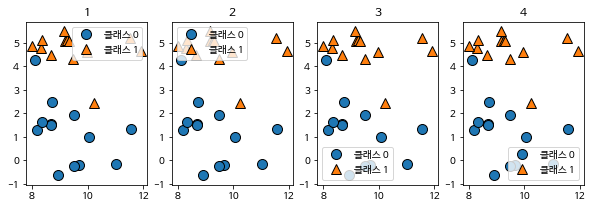

In [3]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 4, figsize=(10,3))
print("X.shape : {}".format(X.shape), "y.shape : {}".format(y.shape))
for i in range(4):
    loca = i+1
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=axes[i])
    axes[i].legend(["클래스 0", "클래스 1"], loc=loca)
    axes[i].set_title(loca)
   

##legend   -  loc = location
#2 1
#3 4     등 파라미터 값에 따라 위치가 legend위치가 달라짐

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
print("y_train.shape : {}".format(y_train.shape), "y_test.shape : {}".format(y_test.shape))

X_train.shape : (19, 2) X_test.shape : (7, 2)
y_train.shape : (19,) y_test.shape : (7,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier

n_neighbors = 사용할 근접 이웃의 수

weight = 가까운 이웃에게 가중치를 주어서 보정 / uniform vs distance

algorithm = 탐색트리! 기본 = auto / KD-tree, BallTree, Auto:fit method에서 선택

metric = minkoski      p=2 >> Euclidian Distance 를 기본으로 거리 계산

kwargs = keyword argument

In [7]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [9]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도 : 0.86


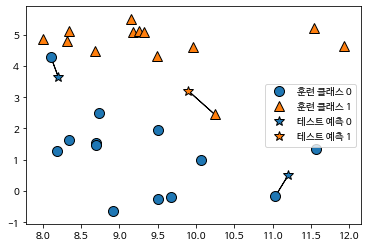

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


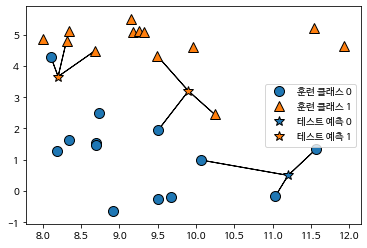

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

fig =  <class 'matplotlib.figure.Figure'> axes =  <class 'numpy.ndarray'>
axes shape =  (4,)


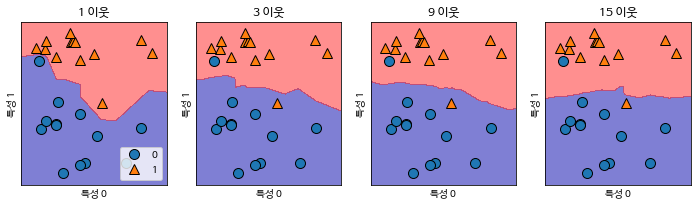

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))
# subplot 1줄 ㅡ 3개 ㅁㅁㅁ 플롯 만들기    / 사이즈=//
# figure 객체를 fig에. plots 객체를 axes에 할당

print('fig = ', type(fig) , 'axes = ',type(axes))

print('axes shape = ', axes.shape)

for n_neighbors, ax in zip([1,3,9,15], axes):  #배열 값을 n_에. axes의 plot객체를 ax에
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) #make forge 데이터
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=4) # 0번 플롯의 legend 위치
    

#mglearn.plots.plot_2d_separator  = 2차원 데이터셋의 분할 평면 그리기
#alpha = 투명도  0~1 사이의 값만 가능       파이썬에서 0.5 > .5로 표현 가능*
#eps = epsilon 폭! 
#ax 


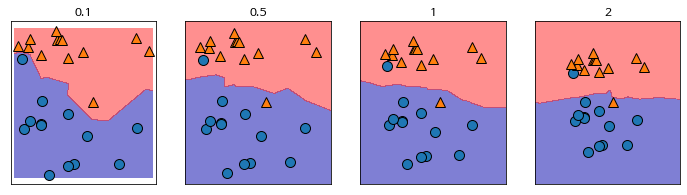

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))
eps=[0.1,0.5,1,2]
for n_neighbors, ax, ep in zip([1,3,9,15], axes, eps):  #배열 값을 n_에. axes의 plot객체를 ax에
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y) #make forge 데이터
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=ep, ax=ax, alpha=0.5)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(ep)

# eps 파라미터 조정. 클수록 폭이 늘어남

In [14]:
#cancer data
#종양의 임상데이터 : Wisconsin Breast Cancer Data
#레이블 : 양성(Benign), 악성(malignant)
#목표 : 조직데이터로 종양이 악성인지 예측

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("데이터의 형태 : ", cancer.data.shape)

print("클래스별 샘플 갯수:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("특성 이름:\n" , cancer.feature_names)


#numpy - bincount 0~최댓값까지를 올림차순으로 정리한 후 각 원소에 대한 빈도수를 반환
#bincount(0)면 0를 카운트해서 리턴


cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
데이터의 형태 :  (569, 30)
클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


['mean radius' 'mean texture' 'mean perimeter' 'mean area']


array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean texture'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean perimeter'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean area'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean area'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='

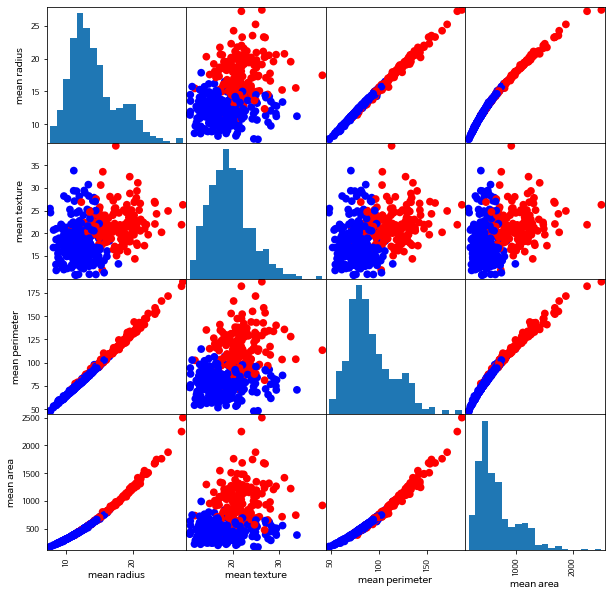

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66)

column = cancer.feature_names[0:4]
print(column)
slice_data = X_train[:,0:4]
dataframe = pd.DataFrame(slice_data, columns=column)

#print(type(iris_dataframe))

pd.plotting.scatter_matrix(dataframe, c=y_train, figsize=(10,10), marker='o',
                       hist_kwds={'bins':20}, s=60, alpha=1, cmap=matplotlib.colors.ListedColormap(["red", "green","blue"]))

##특성 4가지만 뽑아서 산포도 행렬로 그려보았다
#

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66)

print(y)
print("클래스별 샘플 갯수 - stratify = none")

rate = np.bincount(cancer.target)
print("split 이전:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}, 
      (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')

rate = np.bincount(y_train)
print("split 후 train:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(y_train))},
     (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')

rate = np.bincount(y_test)
print("split 후 test:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(y_test))},
      (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')


print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
print("클래스별 샘플 갯수 - stratify = y")

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

rate = np.bincount(cancer.target)
print("split 이전:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}, 
      (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')

rate = np.bincount(y_train)
print("split 후 train:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(y_train))},
     (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')

rate = np.bincount(y_test)
print("split 후 test:\n",{n: v for n, v in zip(cancer.target_names, np.bincount(y_test))},
      (rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')



#train_test_split
#train_size : 정수 입력시 테이터 개수 ! .5 ...>비율
#stratify = 클래스의 비율을 훈련/테스트 데이터에서도 유지할 것인지. default=None
#만약 클래스 [0,1]이 4:6의 비율로 있다면 이것을 훈련/테스트에서도 같은 비율을 쓸 것인지임.
#target값을 그대로 준다는 것은 비율을 유지한다는 것.

#실제로 지정했을 경우 해당 비율로 나뉘어짐.


[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
클래스별 샘플 갯수 - stratify = none
split 이전:
 {'malignant': 212, 'benign': 357} 37 % : 62 %
split 후 train:
 {'malignant': 161, 'benign': 265} 37 % : 62 %
split 후 test:
 {'malignant': 51, 'benign': 92} 35 % : 64 %
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
클래스별 샘플 갯수 - stratify = y
split 이전:
 {'malignant': 212, 'benign': 357} 37 % : 62 %
split 후 train:
 {'malignant': 159, 'benign': 267} 37 % : 62 %
split 후 test:
 {'malignant': 53, 'benign': 90} 37 % : 62 %


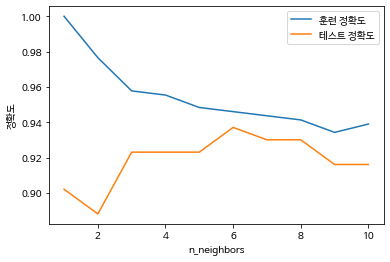

In [17]:
training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.xlabel("n_neighbors")
plt.ylabel("정확도")
plt.legend()



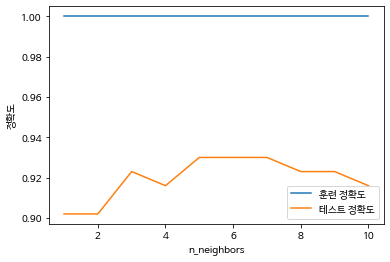

In [20]:
training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.xlabel("n_neighbors")
plt.ylabel("정확도")
plt.legend()


KNeighborsClassifier weights에 distance 파라미터를 주어 가중치를 설정.


훈련 데이터의 경우 정확도가 올라 100%인 반면
테스트 데이터의 경우 반대로 정확도가 떨어짐